In [383]:
import numpy as np
import pandas as pd
import scipy
from scipy import integrate
import math
import matplotlib.pyplot as plt
%matplotlib inline  

Начальные данные

In [384]:
# радиус барабана
Rb = 10

# радиус объекта
Ro = 1

# высота объекта
Ho = 10

# угловая скорость барабана
Wb = 0.175                    # рад/с ~10 град в сек

# угловая скорость объекта
Wo = 0.35                   # рад/с ~10 град в сек

# расстояние до мишени
L = 20

# ширина мишени
Wm = 8

# высота мишени
Hm = 15


In [385]:
starting_point_b = np.array([0, Rb])
starting_point_o = np.array([0, Ro])

In [386]:
# angle in radians
def rotate_point_0 (point, angle):
    x1 = point[0] * np.cos(angle) - point[1] * np.sin(angle)
    y1 = point[0] * np.sin(angle) + point[1] * np.cos(angle)
    return np.array([x1, y1])

In [387]:
point = np.array([1, 2])

In [388]:
angle = 90
angle_rad = np.deg2rad(angle)
angle_rad


1.5707963267948966

In [389]:
rotate_point_0 (point, angle_rad)

array([-2.,  1.])

In [390]:
# угол поворота, w - угловая скорость
def get_current_angle (w, t):
    return (w*t) % (2*np.pi)

In [391]:
def get_object_center (Wb, point_b, t):
    alpha_b = get_current_angle(Wb, t)
    vec_b = rotate_point_0(point_b, alpha_b)
    return vec_b

In [392]:
# point_b  начальное опложение центра объекта, point_o - начальное положение точки на объекте относительно его центра
def get_point_coords (Wb, Wo, point_b, point_o, t):
    vec_b = get_object_center(Wb, point_b, t)
    alpha_o = get_current_angle(Wo, t)
    vec_o = rotate_point_0(point_o, alpha_o)
    return vec_b + vec_o

In [393]:
def get_normal_vec(center, point):
    return point - center

In [394]:
time_spent = 1

In [395]:
cent = get_object_center(Wb, starting_point_b, time_spent)
cent

array([-1.74108138,  9.84726539])

In [396]:
point = get_point_coords(Wb, Wo, starting_point_b, starting_point_o, time_spent)
point

array([-2.08397918, 10.7866381 ])

In [397]:
normal = get_normal_vec(cent, point)
normal

array([-0.34289781,  0.93937271])

In [398]:
def get_cosin(v1, v2):
    return 1 - scipy.spatial.distance.cosine(v1, v2)

In [399]:
def get_sin(v1, v2):
    return math.sqrt(1 - get_cosin(v1, v2)**2)

In [400]:
get_cosin([1, 0], [0.25, -1])

0.24253562503633297

In [401]:
get_sin([1, 0], [0.25, -1])

0.9701425001453319

In [402]:
# f= lambda y, x: x*y**2 + 1
# integrate.dblquad(f, 6, 9, lambda x: -1, lambda x: x+1)

In [403]:
def get_function_value (target_p, object_p, n):

    
    n1 = np.array([0, 0, -1])   # нормаль к плоскости мишени
    s = target_p - object_p     # вектор он точки на объекте к точке на мишени
    s1 = object_p - target_p 
    cos_teta = get_cosin(n, s)
    
#     print ("target=", target_p)
#     print ("object=", object_p)
#     print ("normal=", n)
#     print ("s=", s)
#     print ("\n")
    
    
#     if (cos_teta > 0):
#         print ("reachable")
    if cos_teta < 0:            # точка на объекте не видима с точки на мишени
        return 0
    
    cos_teta1 = abs(get_cosin(n1, s1))
    
    sin_teta1 = abs(get_sin(n1, s1))
    res = (sin_teta1 * cos_teta)
    if (res < 0):
        print ("Achtung! res = ", res)
    return res # * Im0

# point - точка на цилиндре, n - нормаль к этой точке
# t1 - верхняя левая точна мишени t2 - нижняя правая точка мишени (мишень - плоская)
def integrate_one_point(point, n, t1, t2):
    x_target = t1[0]
    f= lambda y, z: get_function_value (np.array([x_target, y, z]), point, n)
    (val, err) = integrate.dblquad(f, t1[1], t2[1], lambda z: t1[2], lambda z: t2[2], epsabs = 1e-2, epsrel=1e-2)
    print (val, err)
    return val

In [404]:
integrate_one_point (np.array([50, -25, 0]), np.array([0, -1, 0]), np.array([150, 10, 20]), np.array([150, -10, -20]))

0.0 0


0.0

In [405]:
def get_target_coords (L, Wm, Hm):
    t1 = np.array([L, Wm/2, Hm/2])
    t2 = np.array([L, -Wm/2, -Hm/2])
    return (t1, t2)
    

In [406]:
# point_o - начальное положение точки на объекте относительно его центра
def get_point_coords (point_center, Wo, start_angle, t, Ro):
    alpha_o = (get_current_angle(Wo, t) + start_angle) % (2*np.pi)
    point_o = np.array([0, Ro])
    vec_o = rotate_point_0(point_o, alpha_o)
    return point_center + vec_o

In [407]:
def get_object_points(point_center, num, Wo, t, Ro):
    res = []
    delta = (2*np.pi) / (num)
    for i in range (0, num):
        p = get_point_coords (point_center, Wo, delta*i, t, Ro)
        res.append([p[0], p[1], 0])
    return res

In [408]:
#get_object_points([0, 0], 12, 0.175, 0, Ro)

In [409]:
turn_time = 6.283/ abs(Wb) # время полного оборота барабана

In [410]:
turn_time

35.902857142857144

In [411]:
time_n = 10    # количество измерений за 1 оборот

In [412]:
time_delta = turn_time / time_n
time_delta

3.5902857142857143

In [413]:
turns_num = 10    # количество оборотов барабана

In [414]:
calc_num = time_n * turns_num
calc_num

100

In [415]:
cur_time = 0
obj_point_num = 12      # колчество точек на цилиндре, в которых вычисляется толщина

res = np.zeros(obj_point_num)
t1, t2 = get_target_coords (L, Wm, Hm)


for i in range (0, calc_num):
    print ("\nturn\n")
    cent = get_object_center(Wb, starting_point_b, cur_time)
    cent_3d = np.array([cent[0], cent[1], 0])
    pts = get_object_points(cent, obj_point_num, Wo, cur_time, Ro)
    
    for i in range (0, obj_point_num):
        p = pts[i]
        normal = get_normal_vec(cent_3d, p)
        normal_3d = np.array([normal[0], normal[1], 0])
        
        res[i] = res[i] + time_delta * integrate_one_point(pts[i], normal_3d, t1, t2)
    
    cur_time += time_delta
    
res


turn

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
3.1117822116203824 0.0003878647486877322
46.50003043345854 5.162540443299617e-13
94.76602963539858 1.0521142805352944e-12
116.35467780798972 1.2917964232527193e-12
104.16860835255525 1.1565038743616724e-12
62.171661040625644 6.902440956649341e-13
10.414753546743148 0.005824679901613778

turn

0.0 0
0.0 0
0.0 0
4.8851116501133784 0.006568316042447328
53.651161284327586 5.956475455573827e-13
99.60939181387 1.1058864026066707e-12
117.61162695570317 1.3057513620984637e-12
101.91586676598874 1.1314934185823049e-12
57.500443155408256 6.383831591728423e-13
6.675851401432436 0.0008466610564158481
0.0 0
0.0 0

turn

0.0 0
5.436034772245948 0.002986227355100187
55.73522711017179 6.187853242042495e-13
100.9727671585951 1.1210229095958713e-12
117.93885098752008 1.3093842786418019e-12
101.30299671380165 1.1246891941518915e-12
56.28230584502012 6.248591182813636e-13
5.683461359439437 0.0025777705067326533
0.0 0
0.0 0
0.0 0
0.0 0

turn

56.265962392429614 6.246776

3.143114862007233 0.0005676704555287228
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
10.36247438344063 0.0052424381774844025
62.087695638476234 6.893118924375522e-13
104.12366466571318 1.1560048992022363e-12
116.36376690158832 1.2918973324625806e-12
94.82654018237669 1.0527860825601719e-12

turn

0.0 0
0.0 0
0.0 0
0.0 0
0.511134898727766 0.0004059162612847059
23.223288630427785 0.00025670410416688574
75.21607991149722 8.350662373978992e-13
108.83404602723866 1.208300637625544e-12
110.17964114699758 1.22323974446334e-12
78.92679472259168 8.762634476088457e-13
28.80743793604444 0.006843622483781924
0.34455019469657283 0.00709706064322608

turn

0.0 0
1.8250471688792356 0.0071853978170666665
21.522244599146266 0.01716634551868608
62.224105343561234 3.507487266750907e-11
98.3559963299214 7.207834666912297e-11
104.5193561049561 6.818067835654091e-11
78.60743508285172 4.7199431692588495e-11
36.294927555145435 0.00913859702879302
6.147673971378505 0.001538219174814025
0.0 0
0.0 0
0.0 0

turn

78.38803002914

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
3.0498327588870424 0.0009315313115617428
46.314348732102246 5.141925633289884e-13
94.64478155895199 1.050768156473669e-12
116.33622566346575 1.2915915632956771e-12
104.25826606115545 1.157499274885903e-12
62.33947473801328 6.921072019718064e-13
10.51930477198146 0.006989313518357465

turn

0.0 0
0.0 0
0.0 0
4.8110783245405955 0.008749177928212625
53.48112927799281 5.937598110738219e-13
99.505964042613 1.1047381236763187e-12
117.60698558313693 1.3056998325115747e-12
102.01110773475725 1.1325508057464489e-12
57.66529472011533 6.402133792006751e-13
6.761648081689342 0.0017610772676627424
0.0 0
0.0 0

turn

0.0 0
5.356509039839389 0.0002796479116685313
55.57075361673415 6.169593016106995e-13
100.87496330842616 1.1199370687323258e-12
117.93797826995748 1.3093745895304818e-12
101.39921437288427 1.1257574247567822e-12
56.44566794738087 6.266728019552844e-13
5.762948476944818 0.004473516191375859
0.0 0
0.0 0
0.0 0
0.0 0

turn

56.10245560787664 6.228623795387538e-

3.2061955049001227 0.0008364148926174173
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
10.257909142878415 0.004078106671695318
61.919648086657034 6.874461898249366e-13
104.0335479018811 1.1550044021411255e-12
116.38167119584216 1.2920961100597834e-12
94.94733411884147 1.054127164655155e-12

turn

0.0 0
0.0 0
0.0 0
0.0 0
0.4881562649649968 0.006965952120148667
23.065647247714537 0.017852220579744876
75.04942680309281 8.332160162171399e-13
108.77208398887063 1.2076127208090552e-12
110.2455997160316 1.2239720316834691e-12
79.09889868162502 8.781741853883253e-13
28.973184382019745 0.008097528796641273
0.36697246034379327 0.005653820494133022

turn

0.0 0
1.7759121524164565 0.009990135582461798
21.37395522292784 0.015401841747009797
62.00590561068165 3.4071921350214296e-11
98.26019505497035 7.288703483325026e-11
104.5818780142979 6.517696540986382e-11
78.80632156127942 4.7353439604532496e-11
36.47898413372878 0.020840822009295223
6.23383312032693 0.002171193704664996
0.0 0
0.0 0
0.0 0

turn

78.18799966892

108.98698290087546 1.2099985780098018e-12


array([13434.50316245, 12176.51653849, 12488.92947218, 12078.52039437,
       12490.79136984, 12173.84458853, 13435.18037864, 12861.28850082,
       13676.88039659, 13619.22421011, 13679.18592772, 12857.17069755])

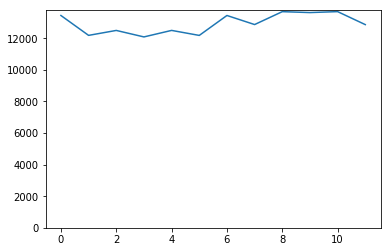

In [416]:
plt.figure()
plt.plot(res)
plt.ylim(bottom = 0)
plt.show()